In [1]:
import pandas as pd
from pyspark.sql import SQLContext
from pyspark.sql.functions import *
from pyspark import SparkContext
sc = SparkContext()
sqlContext = SQLContext(sc)

In [16]:
rdd = sc.textFile('datasets/flights_info.csv')
# rdd.collect()
rawdata = rdd.map(lambda x: (x.split(",")[-1], x.split(",")[0].split(' ')[1] ,float(x.split(",")[3])))
rawdataframe = sqlContext.createDataFrame(rawdata, ["Brand", "Departure Time", "Price"])
rawdataframe.show()

+----------+--------------+------+
|     Brand|Departure Time| Price|
+----------+--------------+------+
|   Pegasus|         06:20|157.99|
|       THY|         11:15|193.99|
|       THY|         16:30|193.99|
|       THY|         19:25|193.99|
|Anadolujet|         10:00|201.99|
|   Pegasus|         20:25|207.99|
|       THY|         19:30|330.99|
|   Pegasus|         11:00|157.99|
|   Pegasus|         15:20|157.99|
|   Pegasus|         17:25|157.99|
|   Pegasus|         20:15|157.99|
|   Pegasus|         22:20|157.99|
|   Pegasus|         23:55|157.99|
|   Pegasus|         06:15|182.99|
|   Pegasus|         07:10|182.99|
|       THY|         11:30|203.99|
|       THY|         15:45|203.99|
|       THY|         19:35|203.99|
|Anadolujet|         06:40|247.99|
|Anadolujet|         07:35|247.99|
+----------+--------------+------+
only showing top 20 rows



In [17]:
average_priceof_month = rawdataframe.groupBy('Brand').agg(avg('Price').alias('Average Price')).dropna().orderBy("Average Price")
average_priceof_month.show()

+----------+------------------+
|     Brand|     Average Price|
+----------+------------------+
|   Pegasus|144.23561403508762|
|       THY| 292.2900000000004|
|Anadolujet| 387.1744444444443|
+----------+------------------+



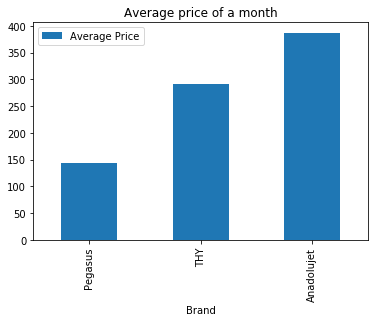

In [18]:
average_data = average_priceof_month.toPandas()
average_data.plot(x = "Brand", kind = "bar", title = "Average price of a month")

In [19]:
total_flights = rawdataframe.groupBy("Brand").agg(count("Price").alias("Total Number of Flights"))
total_flights.show()

+----------+-----------------------+
|     Brand|Total Number of Flights|
+----------+-----------------------+
|       THY|                    180|
|Anadolujet|                     90|
|   Pegasus|                     57|
+----------+-----------------------+



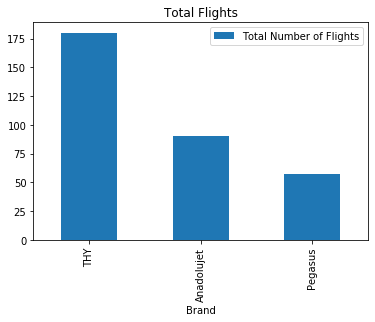

In [20]:
totalflight_dataframe = total_flights.toPandas()
totalflight_dataframe.plot(x = "Brand", kind = "bar", title = "Total Flights")

In [21]:
def strtotime(x):
    return int(x.split(":")[0])

In [22]:
rdd = sc.textFile('datasets/flights_info.csv')

rdd2 = rdd.map(lambda x: (x.split(",")[-1], x.split(",")[0].split(' ')[1].split(':')[0] ,float(x.split(",")[3])))

In [23]:
datafr = sqlContext.createDataFrame(rdd2, ["Brand", "Departure Time", "Price"])

In [24]:
fdata = datafr.rollup("Brand", "Departure Time").agg(avg("Price").alias("Average Price")).dropna().orderBy("Departure Time")
# fdata.show(1000)

In [25]:
THY = fdata.filter(fdata["Brand"]=="THY")
Pegasus = fdata.filter(fdata["Brand"]=="Pegasus")
Anadolujet = fdata.filter(fdata["Brand"]=="Anadolujet")
OnurAir = fdata.filter(fdata["Brand"]=="Onur Air")
THY.show()
Pegasus.show()
Anadolujet.show()


+-----+--------------+------------------+
|Brand|Departure Time|     Average Price|
+-----+--------------+------------------+
|  THY|            02|            228.49|
|  THY|            06|            229.49|
|  THY|            07|201.90666666666667|
|  THY|            08|            336.99|
|  THY|            09| 290.6566666666667|
|  THY|            10|            203.49|
|  THY|            11|            326.74|
|  THY|            12|212.15666666666667|
|  THY|            13|            255.49|
|  THY|            14|223.65666666666667|
|  THY|            15|            293.79|
|  THY|            16|463.45153846153846|
|  THY|            17|236.41857142857143|
|  THY|            18|           321.615|
|  THY|            19| 326.4636842105263|
|  THY|            20| 406.9066666666667|
|  THY|            21|316.27571428571434|
|  THY|            22|            223.19|
|  THY|            23|            228.49|
+-----+--------------+------------------+

+-------+--------------+---------

In [26]:
thyprice = THY.select("Average Price").rdd.map(lambda x: x[0]).collect()
pegasusprice = Pegasus.select("Average Price").rdd.map(lambda x: x[0]).collect()
anadolujetprice = Anadolujet.select("Average Price").rdd.map(lambda x: x[0]).collect()


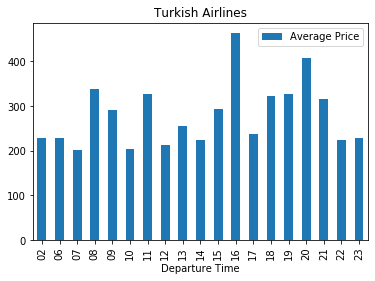

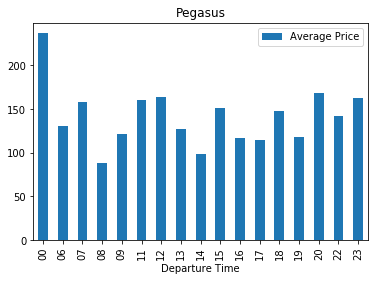

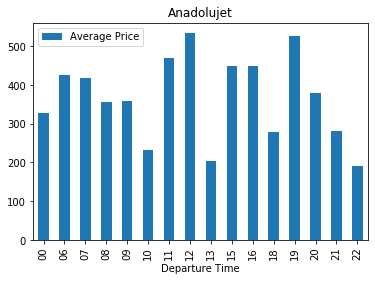

In [27]:
from matplotlib import pyplot as plt
thy = THY.toPandas()
pgs = Pegasus.toPandas()
anjet = Anadolujet.toPandas()
thyplot = thy.plot(x = "Departure Time", y = "Average Price", kind = "bar", title = "Turkish Airlines")
pegasusplot = pgs.plot(x = "Departure Time", y = "Average Price", kind = "bar", title = "Pegasus")
anjetplot = anjet.plot(x = "Departure Time", y = "Average Price", kind = "bar", title = "Anadolujet")

In [28]:

dff2 = rawdataframe.orderBy('Price', ascending=True)
dff2.show()

+-------+--------------+------+
|  Brand|Departure Time| Price|
+-------+--------------+------+
|Pegasus|         08:15| 87.99|
|Pegasus|         08:15| 87.99|
|Pegasus|         18:10| 87.99|
|Pegasus|         09:40| 87.99|
|Pegasus|         11:20| 87.99|
|Pegasus|         18:20| 87.99|
|Pegasus|         17:25| 87.99|
|Pegasus|         07:10| 87.99|
|Pegasus|         06:10| 87.99|
|Pegasus|         12:40| 97.99|
|Pegasus|         06:10| 97.99|
|Pegasus|         11:20| 97.99|
|Pegasus|         17:25| 97.99|
|Pegasus|         14:25| 97.99|
|Pegasus|         15:45| 97.99|
|Pegasus|         19:25|107.99|
|Pegasus|         18:00|107.99|
|Pegasus|         23:30|107.99|
|Pegasus|         15:50|107.99|
|Pegasus|         23:30|107.99|
+-------+--------------+------+
only showing top 20 rows



In [29]:
dff = rawdataframe.orderBy('Price', ascending=False)
dff.show()

+----------+--------------+------+
|     Brand|Departure Time| Price|
+----------+--------------+------+
|       THY|         19:55|726.99|
|       THY|         19:55|726.99|
|       THY|         20:00|725.99|
|       THY|         09:50|725.99|
|       THY|         11:25|725.99|
|       THY|         18:00|725.99|
|       THY|         11:25|725.99|
|       THY|         20:00|725.99|
|       THY|         16:00|725.99|
|       THY|         16:00|725.99|
|       THY|         21:00|725.99|
|       THY|         15:35|715.99|
|       THY|         11:15|714.99|
|       THY|         16:15|714.99|
|       THY|         15:25|714.99|
|       THY|         20:00|714.99|
|       THY|         16:00|714.99|
|       THY|         19:20|714.99|
|Anadolujet|         19:20|711.99|
|Anadolujet|         15:50|711.99|
+----------+--------------+------+
only showing top 20 rows

